# Dataset: https://www.kaggle.com/datasets/krithiik/chess-pieces

In [1]:
DATAPATH = "/content/drive/MyDrive/0.Data/chess"

In [2]:
# Step 1: Find out / declare where the data is
import os
directory_content = os.listdir(DATAPATH)
directory_content

['White queen',
 'Black king',
 'White pawn',
 'Black knight',
 'White knight',
 'White bishop',
 'Black rook',
 'White king',
 'Black queen',
 'Black bishop',
 'Black pawn',
 'White rook']

# Step 2

Load the data. To load the data, we can use specialised functions or just have a long cell that does everything.

In [3]:
import cv2
def load_image_from_file(root, image_filename):
  image_filepath = os.path.join(root, image_filename)
  image = cv2.imread(image_filepath)
  return image

In [4]:
def load_images_from_folder(root, folder_name):
  folder_filepath = os.path.join(root, folder_name)
  image_files = os.listdir(folder_filepath)
  images = []
  for image_file in image_files:
    image = load_image_from_file(folder_filepath, image_file)
    images.append(image)
  return images

In [5]:
def load_data(root):
  image_folders = os.listdir(root)
  X = []
  y = []
  for index, folder in enumerate(image_folders):
    images = load_images_from_folder(root, folder)
    labels = [index for _ in range(len(images))]

    X.extend(images)
    y.extend(labels)

  return X, y

In [6]:
X_, y_ = load_data(DATAPATH)

In [7]:
X = [x for x in X_]
y = [y for y in y_]

In [8]:
len(X), X[0].shape

(300, (640, 640, 3))

# Step 3: Clean and preprocess the data

Prepare the data for subsequent modelling.
- clean (remove unwanted pixel value or images)
- resize or reshape
- convert colors
- etc


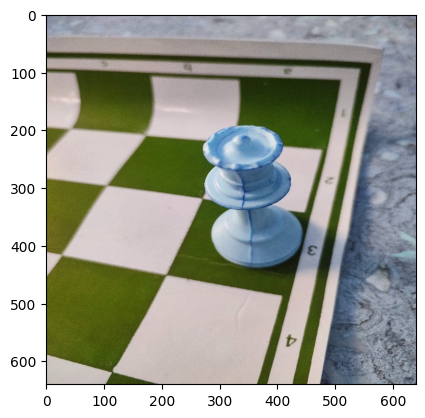

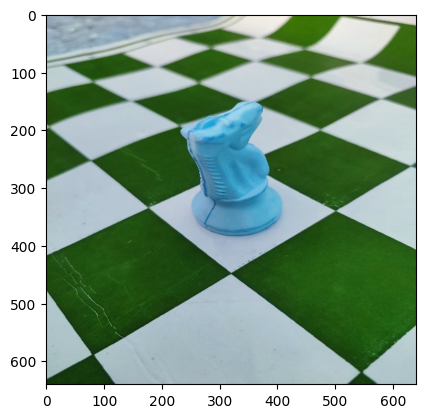

In [9]:
import matplotlib.pyplot as plt

_ = plt.figure(dpi=100)
plt.imshow(X[0])
plt.show()
_ = plt.figure(dpi=100)
plt.imshow(X[100])
plt.show()

In [10]:
# Crop the images
for i in range(len(X)):
  X[i] = X[i][100:500, 100:500, :]

In [11]:
# Conver to grayscale
for i in range(len(X)):
  X[i] = cv2.cvtColor(X[i], cv2.COLOR_BGR2GRAY)

In [12]:
# Rescale pixel values to [0, 1]
for i in range(len(X)):
  X[i] = X[i] / 255.0
  X[i] = cv2.resize(X[i], (100, 100))

# Step 4: Building and training a model


Cast data into the expected format. Every library expects X, y to have a certain format.

In [13]:
import numpy as np
import tensorflow as tf

In [14]:
X = np.array(X)
print(f"Original shape: {X.shape}")
n_samples = X.shape[0]
height, width = X[0].shape
X = X.reshape(n_samples, height, width, 1)
print(f"Processed shape: {X.shape}")

Original shape: (300, 100, 100)
Processed shape: (300, 100, 100, 1)


In [15]:
from tensorflow.keras.utils import to_categorical
n_classes = len(np.unique(y))
print(f"Number of classes: {n_classes}")
yc = to_categorical(y, n_classes)
yc[0], yc[100]

Number of classes: 12


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

Split the data into train, test datasets.

or

Split the data into train, validation, test datasets.


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, yc, test_size=0.2, random_state=24)

In [17]:
X_train.shape, X_test.shape

((240, 100, 100, 1), (60, 100, 100, 1))

Build model

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [73]:
model = Sequential()

model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(height, width, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(37, activation='relu'))

model.add(Dense(n_classes, activation='softmax'))

In [74]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 98, 98, 8)         80        
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 49, 49, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 47, 47, 16)        1168      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 23, 23, 16)        0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 8464)              0         
                                                                 
 dense_18 (Dense)            (None, 37)               

In [75]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [76]:
n_epochs = 20
history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
8/8 [==============================] - 2s 158ms/step - loss: 2.5587 - accuracy: 0.0750 - val_loss: 2.4909 - val_accuracy: 0.1000
Epoch 2/20
8/8 [==============================] - 1s 125ms/step - loss: 2.4477 - accuracy: 0.1208 - val_loss: 2.4436 - val_accuracy: 0.1333
Epoch 3/20
8/8 [==============================] - 1s 118ms/step - loss: 2.3703 - accuracy: 0.3167 - val_loss: 2.4090 - val_accuracy: 0.1833
Epoch 4/20
8/8 [==============================] - 1s 128ms/step - loss: 2.2716 - accuracy: 0.2750 - val_loss: 2.3447 - val_accuracy: 0.1500
Epoch 5/20
8/8 [==============================] - 2s 206ms/step - loss: 2.1166 - accuracy: 0.4250 - val_loss: 2.3007 - val_accuracy: 0.1500
Epoch 6/20
8/8 [==============================] - 2s 194ms/step - loss: 1.9471 - accuracy: 0.4292 - val_loss: 2.2289 - val_accuracy: 0.2000
Epoch 7/20
8/8 [==============================] - 2s 202ms/step - loss: 1.7463 - accuracy: 0.4458 - val_loss: 2.0989 - val_accuracy: 0.2667
Epoch 8/20
8/8 [====

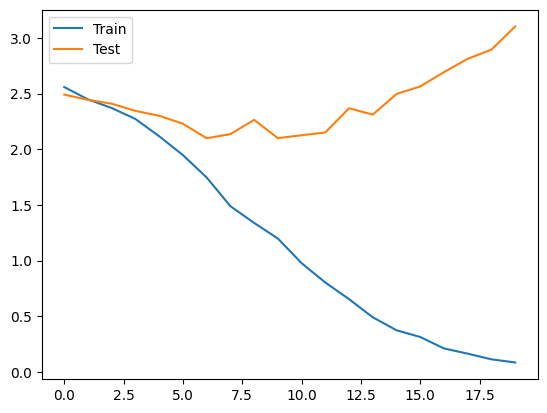

In [77]:
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]
epochs = range(n_epochs)

plt.plot(epochs, training_loss, label="Train")
plt.plot(epochs, test_loss, label="Test")
plt.legend()

plt.show()

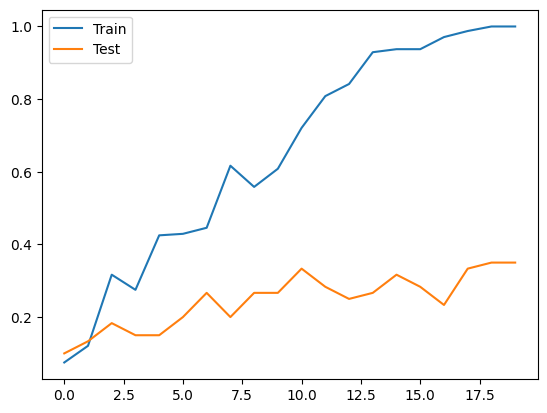

In [78]:
training_acc = history.history["accuracy"]
test_acc = history.history["val_accuracy"]
epochs = range(n_epochs)

plt.plot(epochs, training_acc, label="Train")
plt.plot(epochs, test_acc, label="Test")
plt.legend()
plt.show()